# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [14]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

Пример вывода нескольких объектов и соответствующих меток классов:

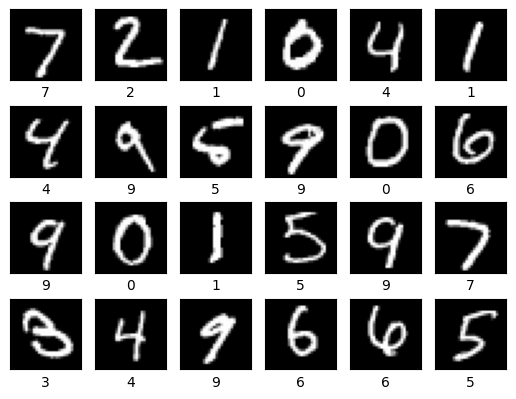

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [3]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [15]:
random_state = 7

(_,_), (x, y) = mnist.load_data()

x = np.array([i.flatten() for i in x])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [16]:
km = KMeans(random_state=random_state, n_clusters=10)
km.fit(x_train, y_train)
print('1.1:', len([i for i in km.labels_ if i == 2]))

1.1: 755


Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [6]:
df = pd.DataFrame({'cluster_label': km.labels_, 'true_label': y_train})
df = df.groupby('cluster_label')['true_label'].value_counts().rename('count').reset_index()

labels = []

for i in range(10):
    labels.append(df[df['cluster_label'] == i].head(1)['true_label'].values[0])

print('1.2:', ', '.join([str(i) for i in labels]))

1.2: 6, 4, 3, 7, 1, 2, 0, 4, 1, 8


Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



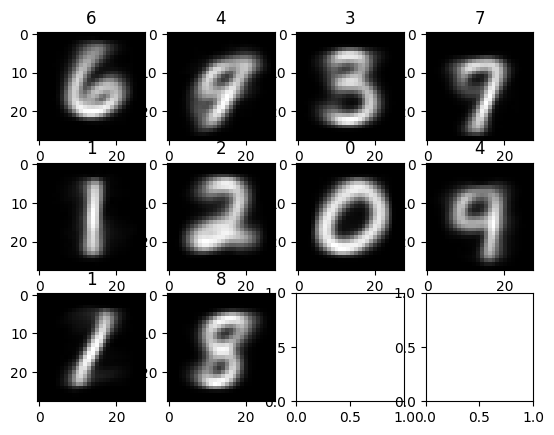

In [9]:
fig, axs = plt.subplots(3, 4)
for i, ax in enumerate(axs.flat[:10]):
    ax.imshow(km.cluster_centers_[i].reshape((28, 28)), cmap='gray')
    ax.set_title(labels[i])

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [10]:
print('1.3:', accuracy_score(y_train, [labels[i] for i in km.labels_]))


1.3: 0.624375


Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [11]:
y_pred = km.predict(x_test)
print('1.4:', accuracy_score(y_test, [labels[i] for i in y_pred]))

print('1.5:', confusion_matrix(y_test, [labels[i] for i in y_pred])[9].argmax())

1.4: 0.6245
1.5: 4


При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [ ]:
# < ENTER YOUR CODE HERE >

Постройте матрицу ошибок.

In [ ]:
# < ENTER YOUR CODE HERE >

С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [ ]:
# < ENTER YOUR CODE HERE >

Вычислите точность модели на тестовых данных.

In [ ]:
# < ENTER YOUR CODE HERE >

Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

In [ ]:
# < ENTER YOUR CODE HERE >

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [ ]:
# < ENTER YOUR CODE HERE >

Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [ ]:
# < ENTER YOUR CODE HERE >

Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.